## Removing Null value analysis

**Description**

Null value removal is a straightforward technique for handling missing data by deleting rows or columns that contain null (missing) values. This method eliminates the uncertainty associated with missing data, simplifying the dataset and ensuring that subsequent analyses are based solely on complete observations.

**Advantages**

By removing null values, this method ensures data integrity and eliminates the risk of introducing bias or noise through imputation. It is simple to implement, computationally efficient, and particularly effective when the proportion of missing data is minimal or concentrated in non-critical variables. This approach is also useful when the missing data pattern is systematic, making imputation less reliable.

**Disadvantages**

Despite its simplicity, null value removal can significantly reduce the dataset's size, especially when the proportion of missing data is high, potentially leading to a loss of valuable information. This reduction in data can negatively impact model performance, especially in machine learning tasks where the sample size is crucial.

Furthermore, if the missing data is not random but dependent on other variables, removing null values can inadvertently introduce bias into the analysis. This method is unsuitable for datasets where preserving the relationships between variables and the original distribution is critical for analysis.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

In [2]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH")
dataset = pd.read_csv(dataset_path)
dataset.head()

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,3,0,81.3479,3,20.0,NaN,158.27,0.63,218.30,28.37,...,253.10,0.40,208.65,23.39,581.50,NaN,-2568.19,2.31,1176.0,3047.0
1,4,0,67.6904,1,27.0,0.06,147.64,0.55,173.64,44.72,...,220.88,0.48,215.70,33.74,641.90,3.33,4113.01,2.76,1942.0,3449.0
2,5,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
3,8,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
4,10,1,73.9726,3,24.0,0.11,233.02,0.48,229.88,39.46,...,196.55,0.53,210.63,26.60,645.95,2.72,-1164.02,2.64,1397.0,2700.0


In [3]:
missing_data = dataset.isna().sum().sort_values()
missing_data

RID                            0
Gender                         0
Ageatscreening                 0
Diagnosis                      0
HipsSumAveragebaseline         1
MMSE0m                         3
ERCsASMbaseline                4
HipsSumVariancebaseline        7
HipsVariancebaseline           8
ERCsEntropybaseline            9
ERCsSumAveragebaseline        11
ERCsSumVariancebaseline       13
ERCsVariancebaseline          14
HipsContrastbaseline          14
ERCsVolumebaseline            14
ERCsContrastbaseline          18
HipsClusterShadebaseline      18
HipposcampusVolumebaseline    19
HipsCorelationbaseline        20
HipsEntropybaseline           23
HipsASMbaseline               25
ERCsCorelationbaseline        28
ERCsClusterShadebaseline      34
ERCs_thicknessbaseline        37
dtype: int64

In [7]:
null_dataset = dataset.dropna()
null_dataset

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
1,4,0,67.6904,1,27.0,0.06,147.64,0.55,173.64,44.72,...,220.88,0.48,215.70,33.74,641.90,3.33,4113.01,2.76,1942.0,3449.0
2,5,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
3,8,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
4,10,1,73.9726,3,24.0,0.11,233.02,0.48,229.88,39.46,...,196.55,0.53,210.63,26.60,645.95,2.72,-1164.02,2.64,1397.0,2700.0
5,14,1,78.6137,0,29.0,0.12,188.33,0.49,183.76,39.63,...,241.64,0.44,226.48,35.11,664.29,3.10,8478.33,3.01,1809.0,3292.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,1201,1,75.6411,3,26.0,0.18,173.84,0.59,215.04,33.84,...,281.15,0.37,222.73,27.94,609.75,2.84,-1924.49,1.94,1112.0,2705.0
604,1221,0,71.2712,3,21.0,0.22,174.02,0.58,211.07,30.56,...,224.78,0.47,205.49,27.36,597.20,2.77,1146.39,2.44,1526.0,2913.0
605,1248,1,79.8548,3,23.0,0.19,199.31,0.56,229.63,33.13,...,220.41,0.48,214.97,27.16,639.47,2.79,-919.84,1.99,1215.0,2273.0
606,1253,1,62.7452,3,24.0,0.05,142.05,0.50,147.12,46.21,...,217.38,0.51,220.55,32.54,664.84,3.09,5289.89,3.27,2321.0,3739.0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    null_dataset.drop("Diagnosis", axis=1),  
    null_dataset["Diagnosis"],  
    test_size=0.3,  
    random_state=42,  
)

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((311, 23), (134, 23), (311,), (134,))

### Check for normal distribution and skewness change 

In [6]:
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis

def check_normality(dataset):
    
    results = {}

    for column in dataset.columns:  
        stat, p = shapiro(dataset[column].dropna())
        skewness = skew(dataset[column].dropna())
        kurt = kurtosis(dataset[column].dropna())
        results[column] = {'Statistic': stat, 'p-value': p, 'Skewness': skewness, 'Kurtosis': kurt, 'Normal': p > 0.05} 

    # Convert results to DataFrame for better visualization
    results_df = pd.DataFrame(results).T
    return results_df

In [17]:
X_train_norm = check_normality(X_train)
X_test_norm = check_normality(X_test)

X_train_norm_null = check_normality(X_train_t)
X_test_norm_null = check_normality(X_test_t)

NameError: name 'X_train_t' is not defined

In [18]:
X_train_norm

,Statistic,p-value,Skewness,Kurtosis,Normal
RID,0.960571,0.0,-0.191996,-1.042352,False
Gender,0.629481,0.0,0.280362,-1.921397,False
Ageatscreening,0.98636,0.000507,-0.352696,0.074891,False
MMSE0m,0.899325,0.0,-0.86101,0.089239,False
HipsASMbaseline,0.962064,0.0,0.527045,-0.234448,False
HipsContrastbaseline,0.991863,0.022984,0.21891,-0.294576,False
HipsCorelationbaseline,0.973015,0.000001,-0.465003,-0.239129,False
HipsVariancebaseline,0.93952,0.0,-0.707282,-0.345891,False
HipsSumAveragebaseline,0.992093,0.023528,-0.087851,-0.465718,False
HipsSumVariancebaseline,0.93146,0.0,-0.775533,-0.258937,False


In [19]:
normal_train_df = pd.DataFrame({"p-value": X_train_norm["p-value"],
                                "Skewness": X_train_norm["Skewness"],
                                "Kurtosis": X_train_norm["Kurtosis"],
                                "X_train_norm": X_train_norm["Normal"],
                                
                                "p-value_null": X_test_norm_null["p-value"],
                                "Skewness_null": X_test_norm_null["Skewness"],
                                "Kurtosis_null": X_test_norm_null["Kurtosis"],
                                "X_train_null": X_test_norm_null["Normal"],
})

normal_test_df = pd.DataFrame({"p-value": X_test_norm["p-value"],
                                "Skewness": X_test_norm["Skewness"],
                                "Kurtosis": X_test_norm["Kurtosis"],
                                "X_test_norm": X_test_norm["Normal"],
                                
                                "p-value_null": X_test_norm_null["p-value"],
                                "Skewness_null": X_test_norm_null["Skewness"],
                                "Kurtosis_null": X_test_norm_null["Kurtosis"],
                               "X_test_null": X_test_norm_null["Normal"]
})

In [20]:
normal_train_df

,Statistic,p-value,Skewness,Kurtosis,X_train_norm,Statistic_null,p-value_null,Skewness_null,Kurtosis_null,X_train_null
RID,0.960571,0.0,-0.191996,-1.042352,False,0.955086,0.000118,-0.087105,-1.190447,False
Gender,0.629481,0.0,0.280362,-1.921397,False,0.635969,0.0,0.069007,-1.995238,False
Ageatscreening,0.98636,0.000507,-0.352696,0.074891,False,0.980624,0.038036,-0.415909,-0.044668,False
MMSE0m,0.899325,0.0,-0.86101,0.089239,False,0.920803,0.0,-0.85329,0.467374,False
HipsASMbaseline,0.962064,0.0,0.527045,-0.234448,False,0.974208,0.007733,0.412692,-0.243289,False
HipsContrastbaseline,0.991863,0.022984,0.21891,-0.294576,False,0.992161,0.607868,-0.213827,-0.290364,True
HipsCorelationbaseline,0.973015,0.000001,-0.465003,-0.239129,False,0.960821,0.000379,-0.648975,0.051494,False
HipsVariancebaseline,0.93952,0.0,-0.707282,-0.345891,False,0.942707,0.000012,-0.74229,-0.083728,False
HipsSumAveragebaseline,0.992093,0.023528,-0.087851,-0.465718,False,0.980837,0.040144,0.028929,-0.655852,False
HipsSumVariancebaseline,0.93146,0.0,-0.775533,-0.258937,False,0.945567,0.00002,-0.748119,-0.054951,False


In [26]:
print("Total normal distribution count for X_train_norm")
print(normal_train_df["X_train_norm"].value_counts())

print("Total normal distribution count for X_train_null")
print(normal_train_df["X_train_null"].value_counts())

Total normal distribution count for X_train_norm
X_train_norm
False    20
True      3
Name: count, dtype: int64
Total normal distribution count for X_train_null
X_train_null
False    12
True     11
Name: count, dtype: int64


In [22]:
normal_test_df

,Statistic,p-value,Skewness,Kurtosis,X_test_norm,Statistic_null,p-value_null,Skewness_null,Kurtosis_null,X_test_null
RID,0.960508,0.000051,-0.016388,-1.13125,False,0.955086,0.000118,-0.087105,-1.190447,False
Gender,0.636327,0.0,-0.032791,-1.998925,False,0.635969,0.0,0.069007,-1.995238,False
Ageatscreening,0.980514,0.011678,-0.433128,-0.042661,False,0.980624,0.038036,-0.415909,-0.044668,False
MMSE0m,0.917092,0.0,-0.833102,0.252238,False,0.920803,0.0,-0.85329,0.467374,False
HipsASMbaseline,0.969407,0.000648,0.426523,-0.261149,False,0.974208,0.007733,0.412692,-0.243289,False
HipsContrastbaseline,0.993728,0.641145,-0.093392,-0.423827,True,0.992161,0.607868,-0.213827,-0.290364,True
HipsCorelationbaseline,0.966959,0.000316,-0.54832,-0.180166,False,0.960821,0.000379,-0.648975,0.051494,False
HipsVariancebaseline,0.941051,0.000001,-0.751652,-0.130158,False,0.942707,0.000012,-0.74229,-0.083728,False
HipsSumAveragebaseline,0.984341,0.039599,-0.17071,-0.360171,False,0.980837,0.040144,0.028929,-0.655852,False
HipsSumVariancebaseline,0.942657,0.000001,-0.758671,-0.07304,False,0.945567,0.00002,-0.748119,-0.054951,False


In [27]:
print("\nTotal normal distribution count for X_test_norm")
print(normal_test_df["X_test_norm"].value_counts())

print("\nTotal normal distribution count for X_test_null")
print(normal_test_df["X_test_null"].value_counts())


Total normal distribution count for X_test_norm
X_test_norm
False    13
True     10
Name: count, dtype: int64

Total normal distribution count for X_test_null
X_test_null
False    12
True     11
Name: count, dtype: int64


#### Comparison of Imputed and Original X_train Dataset

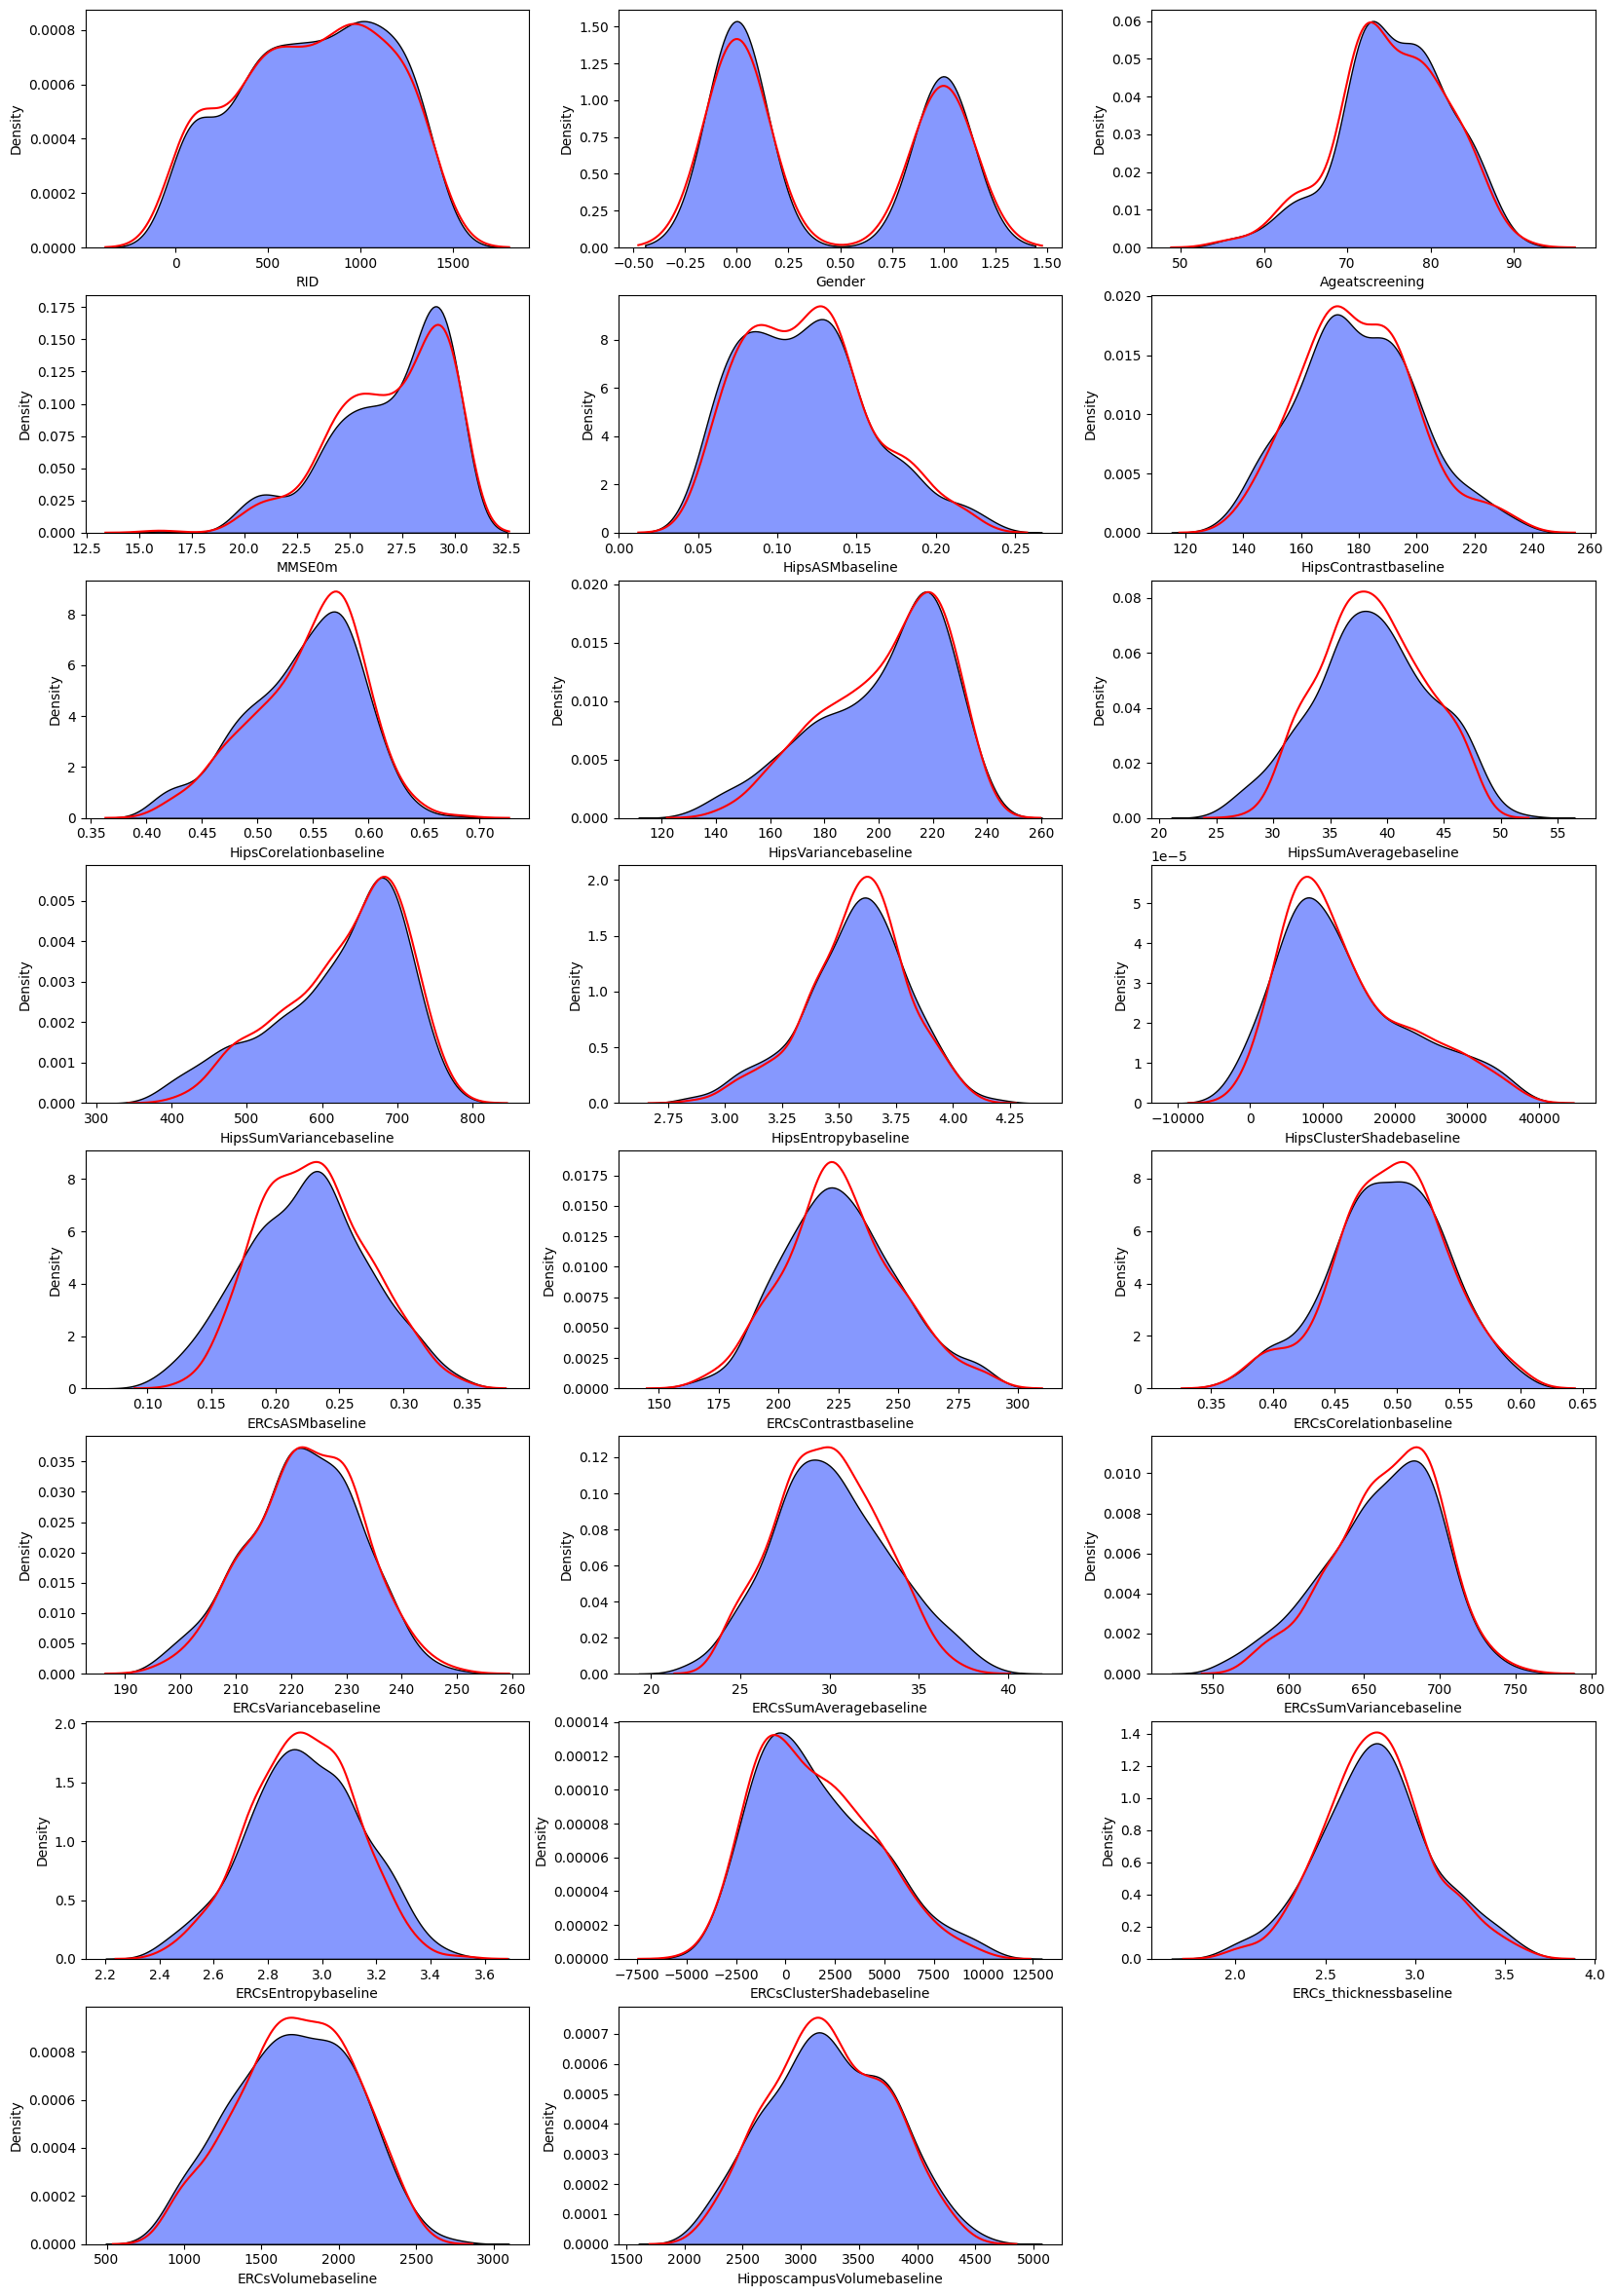

In [24]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train_copy.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_copy[X_train_copy.columns[i]], color="#5e76fe", multiple="stack")

    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_t[X_train_t.columns[i]], color= "red")

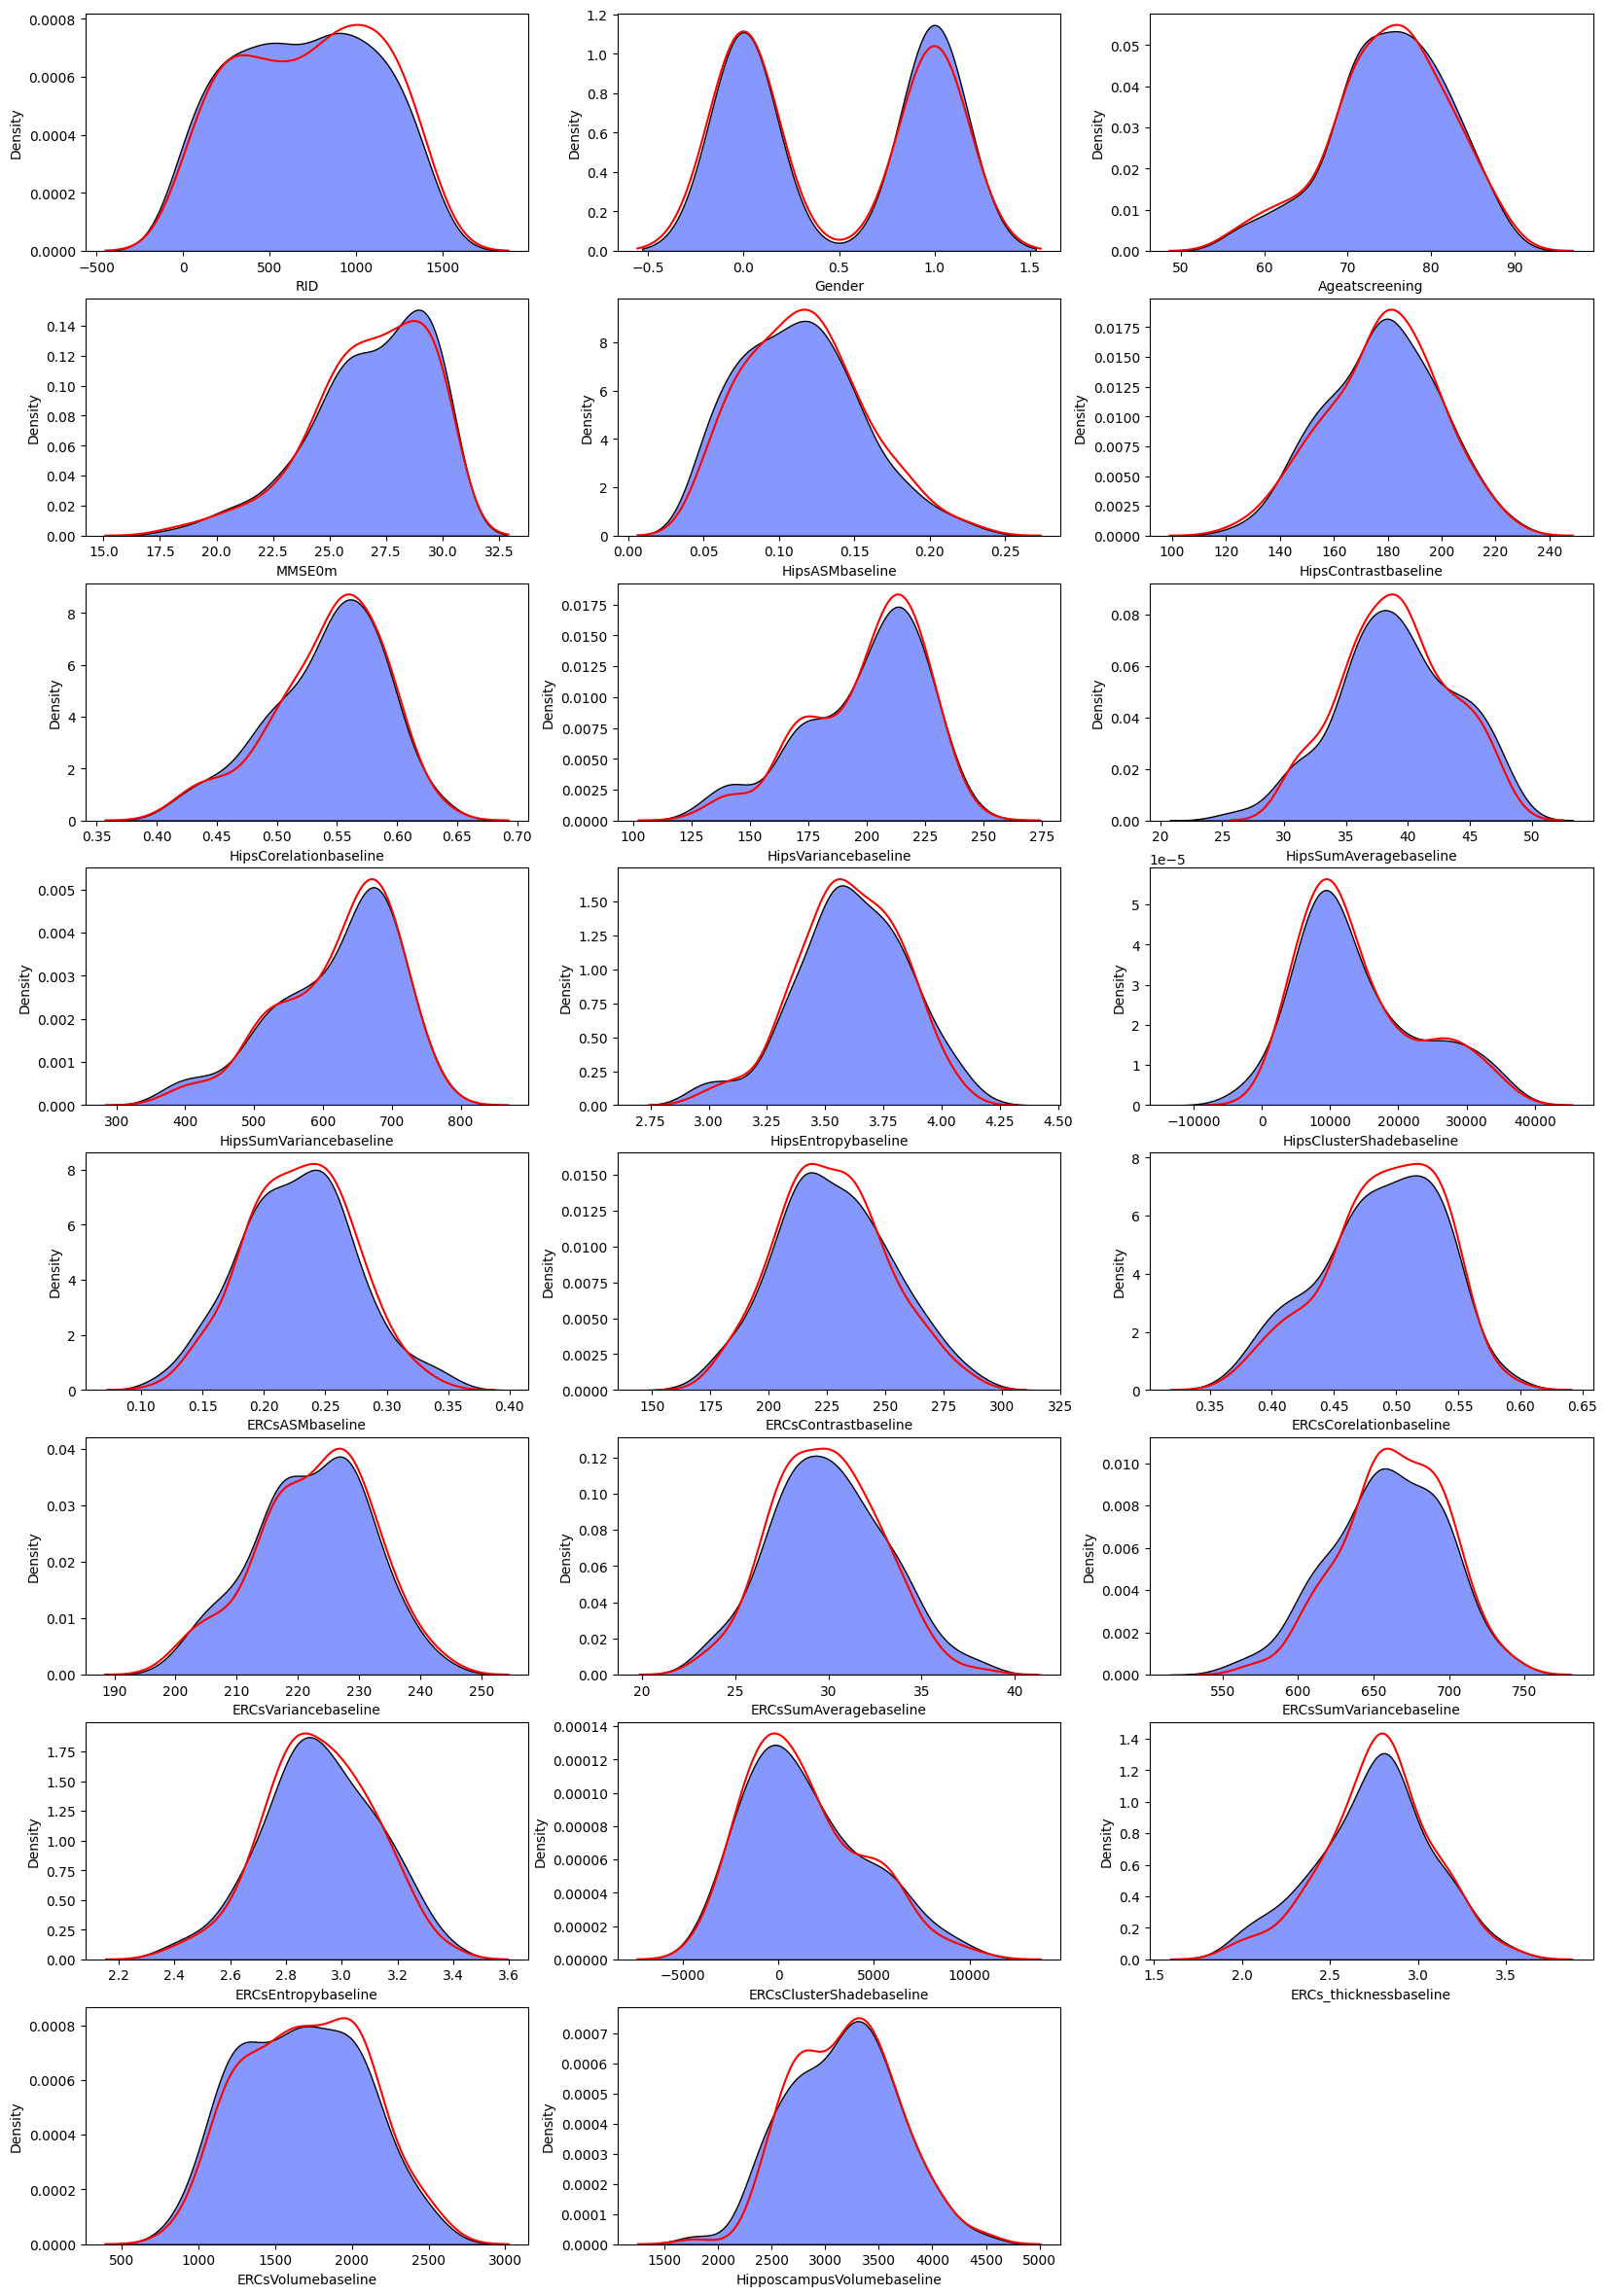

In [25]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_test_copy.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_copy[X_test_copy.columns[i]], color="#5e76fe", multiple="stack")

    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_t[X_test_t.columns[i]], color= "red")

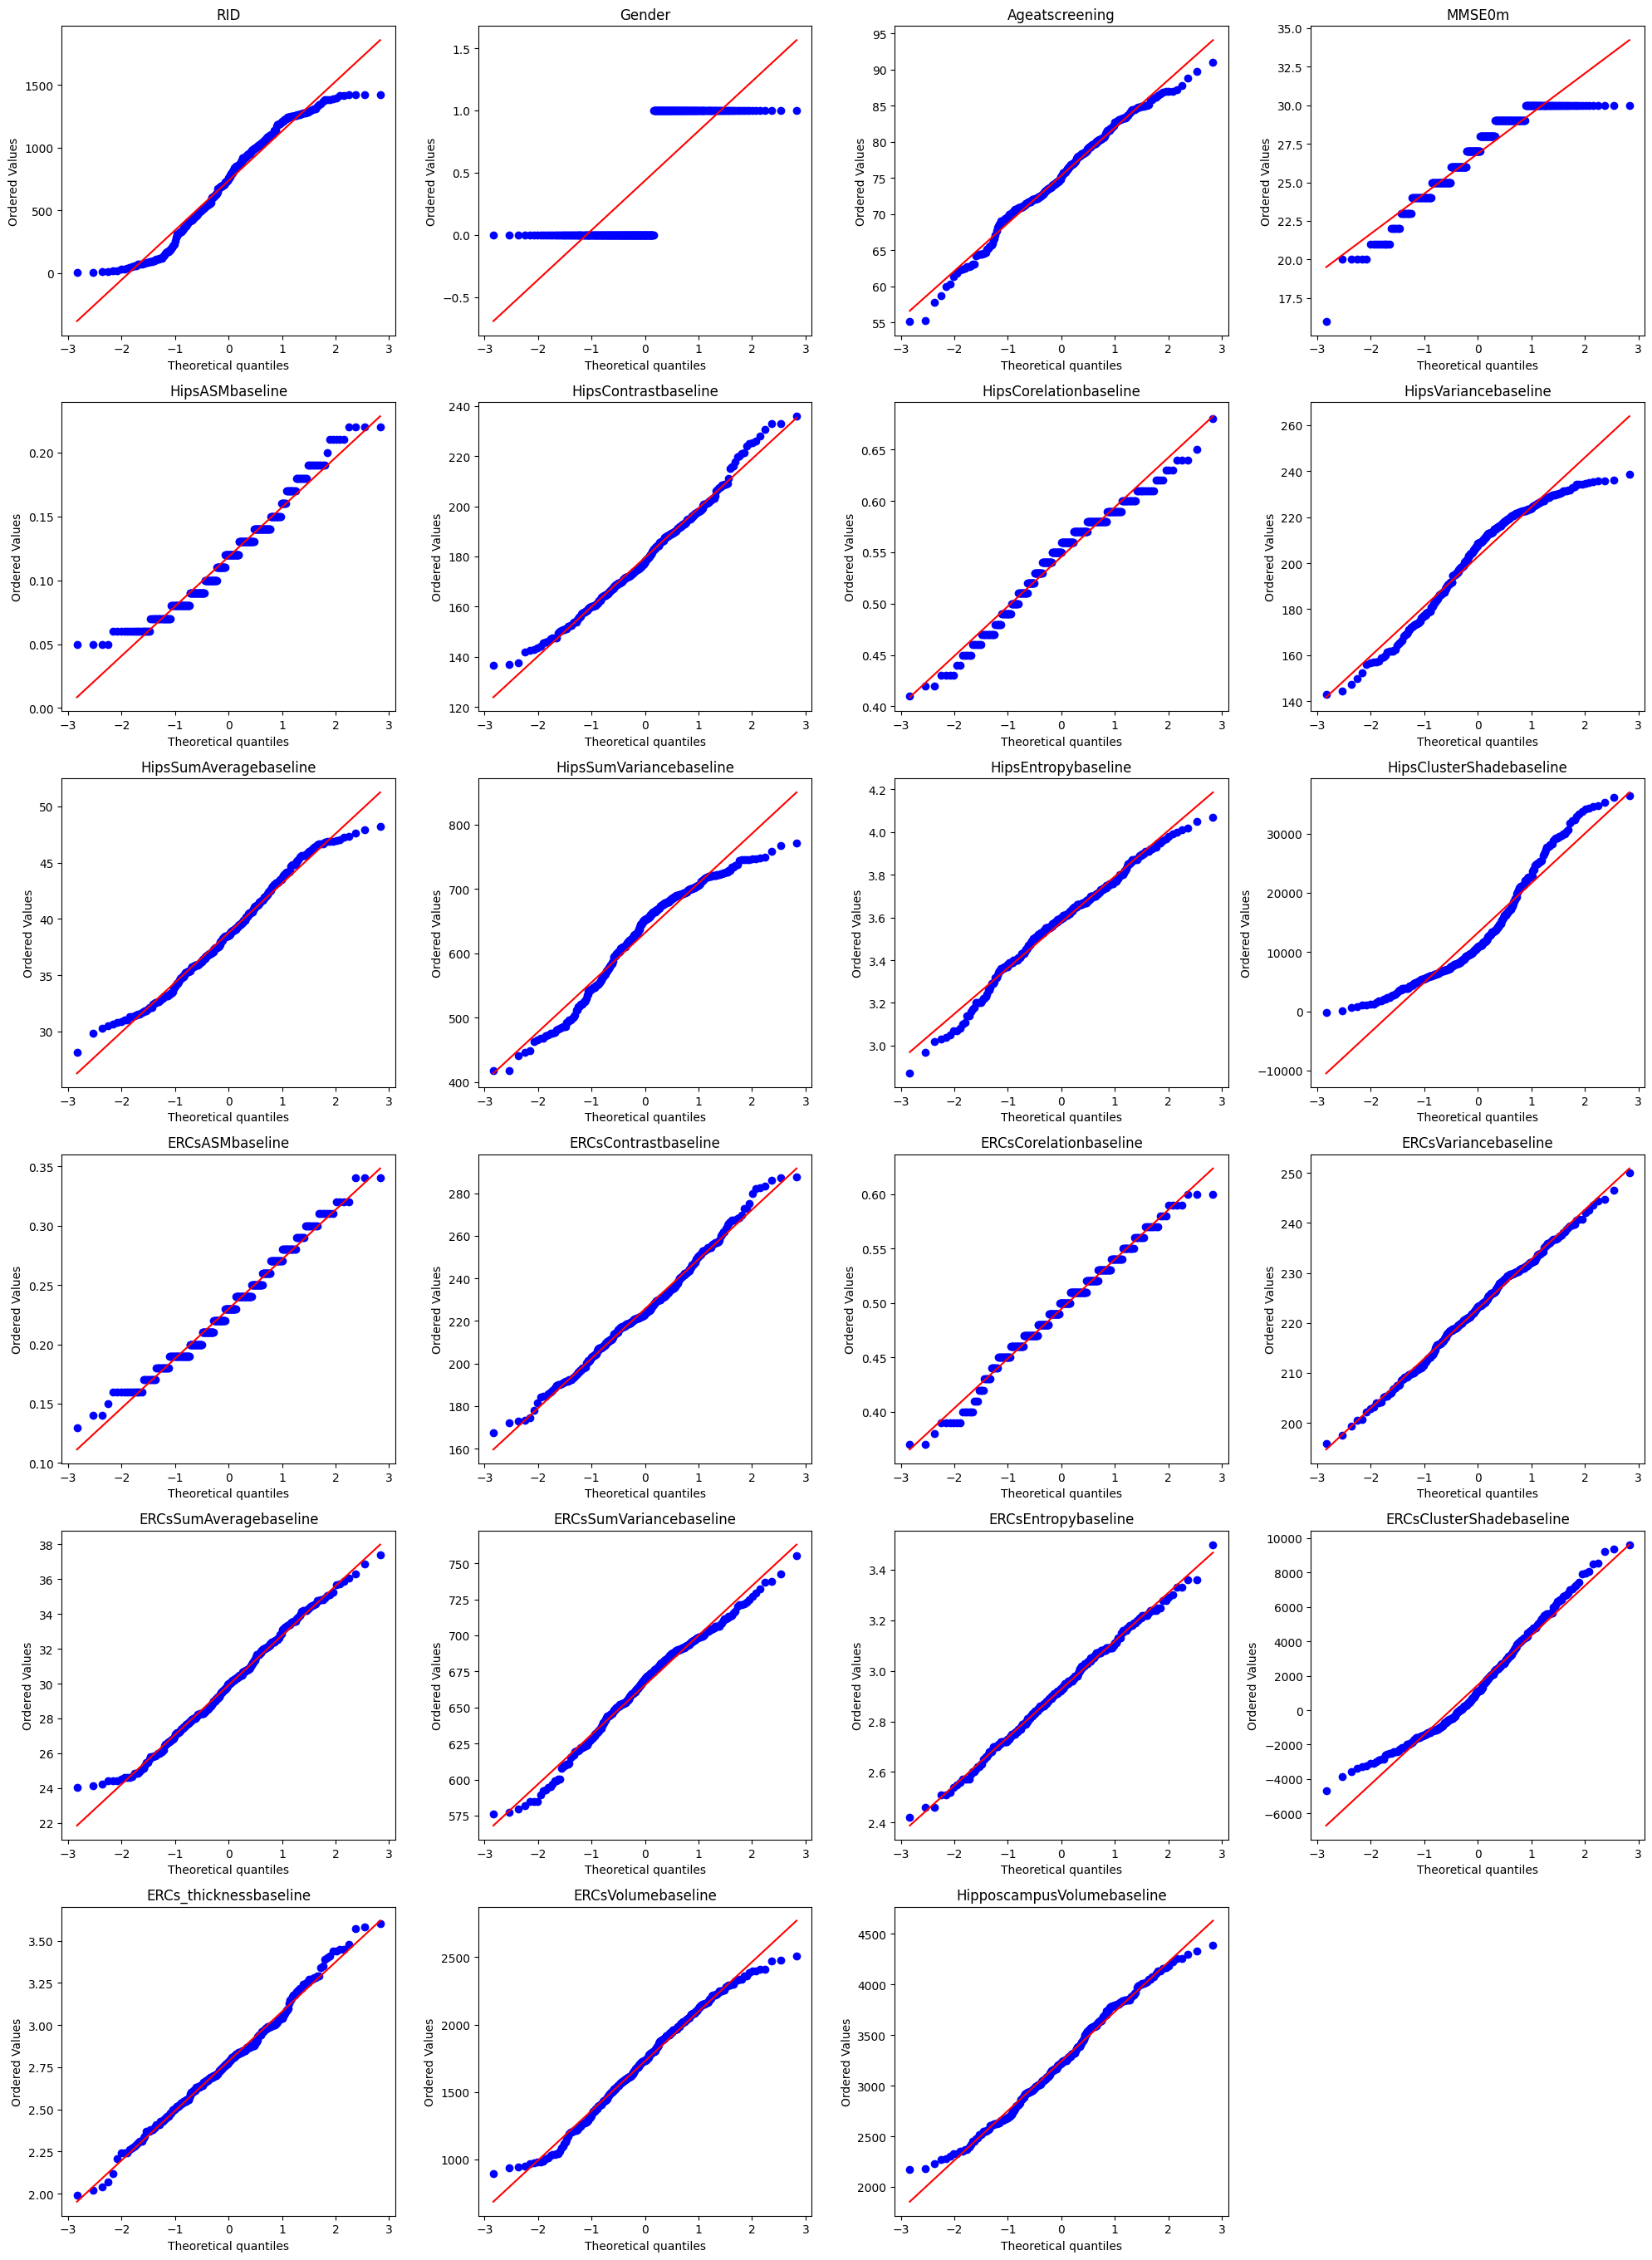

In [28]:
from scipy import stats

# Plot Q-Q plots for each column
plt.figure(figsize=(20, 45))

for i in range(len(X_train_t.columns)):
    plt.subplot(10, 4, i + 1)
    
    stats.probplot(X_train_t[X_train_t.columns[i]], 
                   dist='norm', plot=plt)
    plt.title(X_train_t.columns[i])

plt.tight_layout()

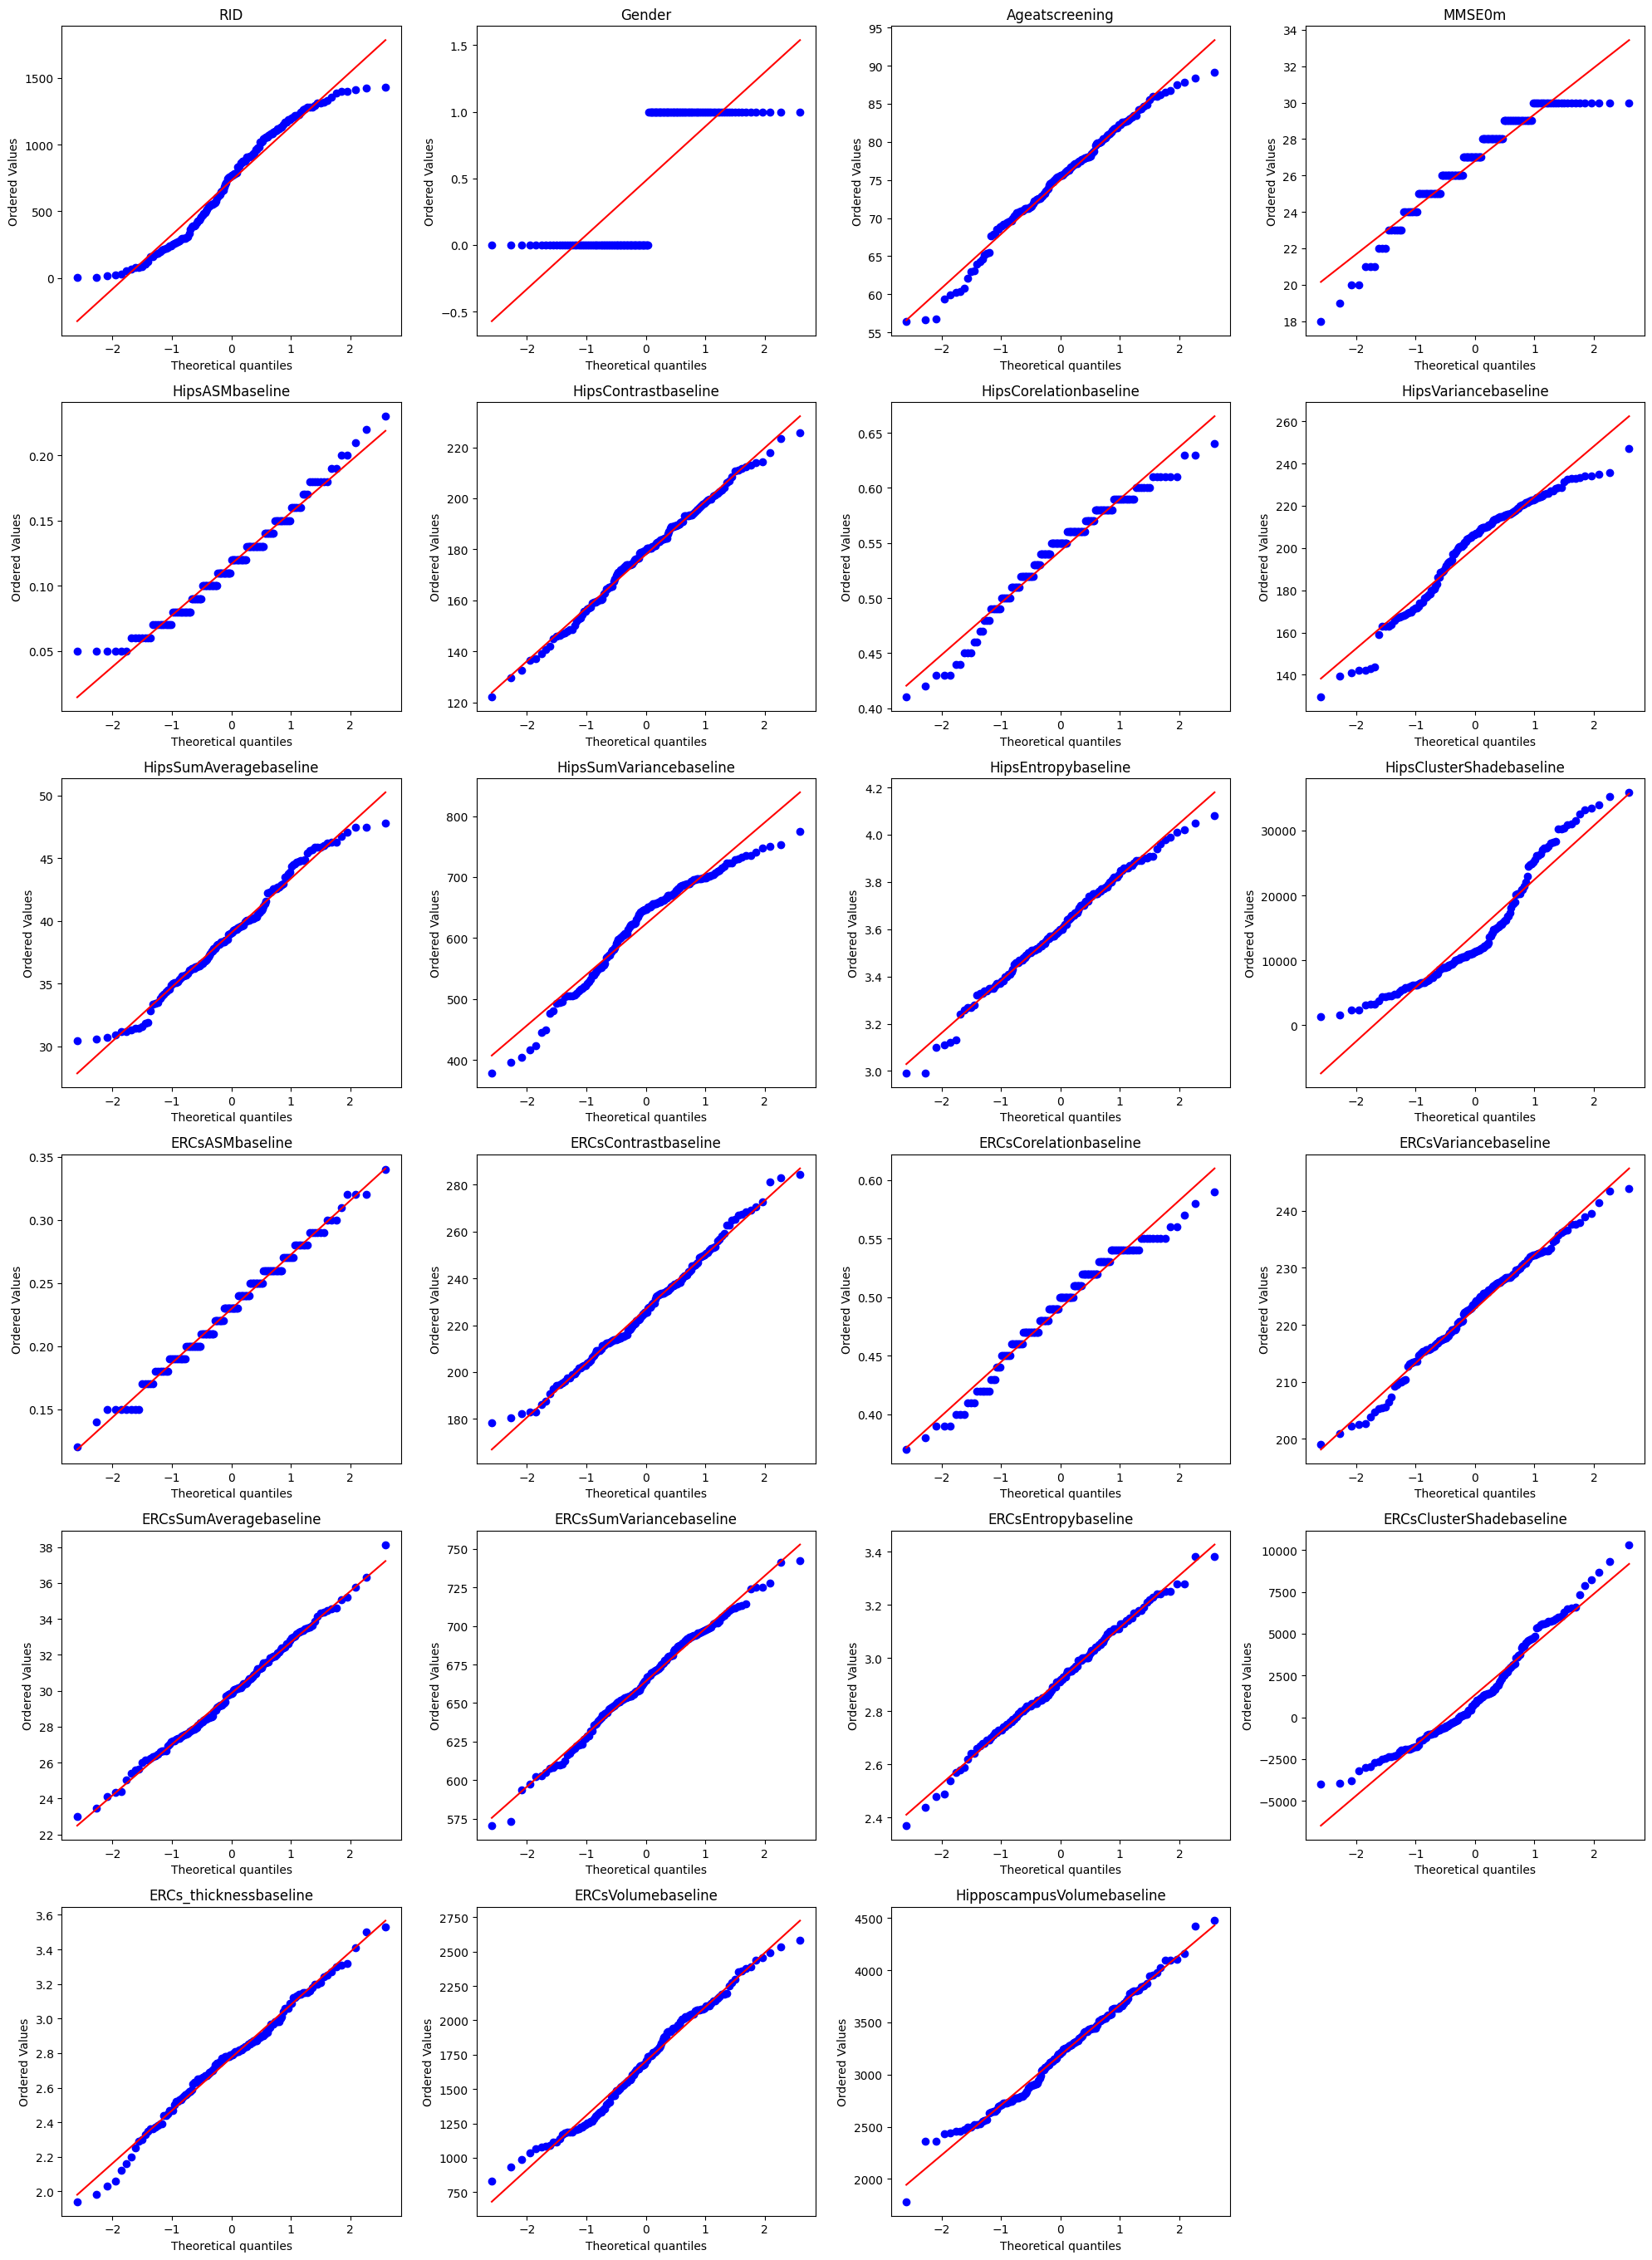

In [29]:
# Plot Q-Q plots for each column
plt.figure(figsize=(20, 45))

for i in range(len(X_test_t.columns)):
    plt.subplot(10, 4, i + 1)
    stats.probplot(X_test_t[X_test_t.columns[i]], 
                   dist='norm', plot=plt)
    plt.title(X_test_t.columns[i])

plt.tight_layout()

### Check for variance change

In [38]:
variance_train_df = pd.DataFrame({"X_train_std": X_train.var(),
              "X_train_null std": X_train_t.var(),
            }
)

variance_train_df["Changed_train"] = (variance_train_df.nunique(axis=1) > 1)

variance_test_df = pd.DataFrame({"X_test": X_test.var(),
              "X_test_null std": X_test_t.var(),
            }
)

variance_test_df["Changed_test"] = (variance_test_df.nunique(axis=1) > 1)

variance_df_report = pd.concat([variance_train_df, variance_test_df], axis=1)
variance_df_report

,X_train_std,X_train_null std,Changed_train,X_test,X_test_null std,Changed_test
RID,1.563815e+05,1.602314e+05,True,1.654556e+05,1.673532e+05,True
Gender,2.457603e-01,2.468116e-01,True,2.513061e-01,2.514368e-01,True
Ageatscreening,4.307941e+01,4.360332e+01,True,4.862086e+01,4.995195e+01,True
MMSE0m,7.689551e+00,7.302330e+00,True,7.112112e+00,6.943008e+00,True
HipsASMbaseline,1.686332e-03,1.537900e-03,True,1.611935e-03,1.552854e-03,True
HipsContrastbaseline,4.227328e+02,3.852780e+02,True,4.375496e+02,4.301622e+02,True
HipsCorelationbaseline,2.584648e-03,2.367736e-03,True,2.353091e-03,2.259004e-03,True
HipsVariancebaseline,5.847527e+02,4.832163e+02,True,6.732886e+02,5.941448e+02,True
HipsSumAveragebaseline,2.642004e+01,1.941875e+01,True,2.277794e+01,1.849628e+01,True
HipsSumVariancebaseline,7.585556e+03,6.155663e+03,True,7.896207e+03,7.142405e+03,True


In [39]:
print(variance_df_report["Changed_train"].value_counts())
print(variance_df_report["Changed_test"].value_counts())

Changed_train
True    23
Name: count, dtype: int64
Changed_test
True    23
Name: count, dtype: int64


In [40]:
variance_df_check = variance_df_report.drop(["Changed_train", "Changed_test"], axis=1)
variance_df_check

,X_train_std,X_train_null std,X_test,X_test_null std
RID,1.563815e+05,1.602314e+05,1.654556e+05,1.673532e+05
Gender,2.457603e-01,2.468116e-01,2.513061e-01,2.514368e-01
Ageatscreening,4.307941e+01,4.360332e+01,4.862086e+01,4.995195e+01
MMSE0m,7.689551e+00,7.302330e+00,7.112112e+00,6.943008e+00
HipsASMbaseline,1.686332e-03,1.537900e-03,1.611935e-03,1.552854e-03
HipsContrastbaseline,4.227328e+02,3.852780e+02,4.375496e+02,4.301622e+02
HipsCorelationbaseline,2.584648e-03,2.367736e-03,2.353091e-03,2.259004e-03
HipsVariancebaseline,5.847527e+02,4.832163e+02,6.732886e+02,5.941448e+02
HipsSumAveragebaseline,2.642004e+01,1.941875e+01,2.277794e+01,1.849628e+01
HipsSumVariancebaseline,7.585556e+03,6.155663e+03,7.896207e+03,7.142405e+03


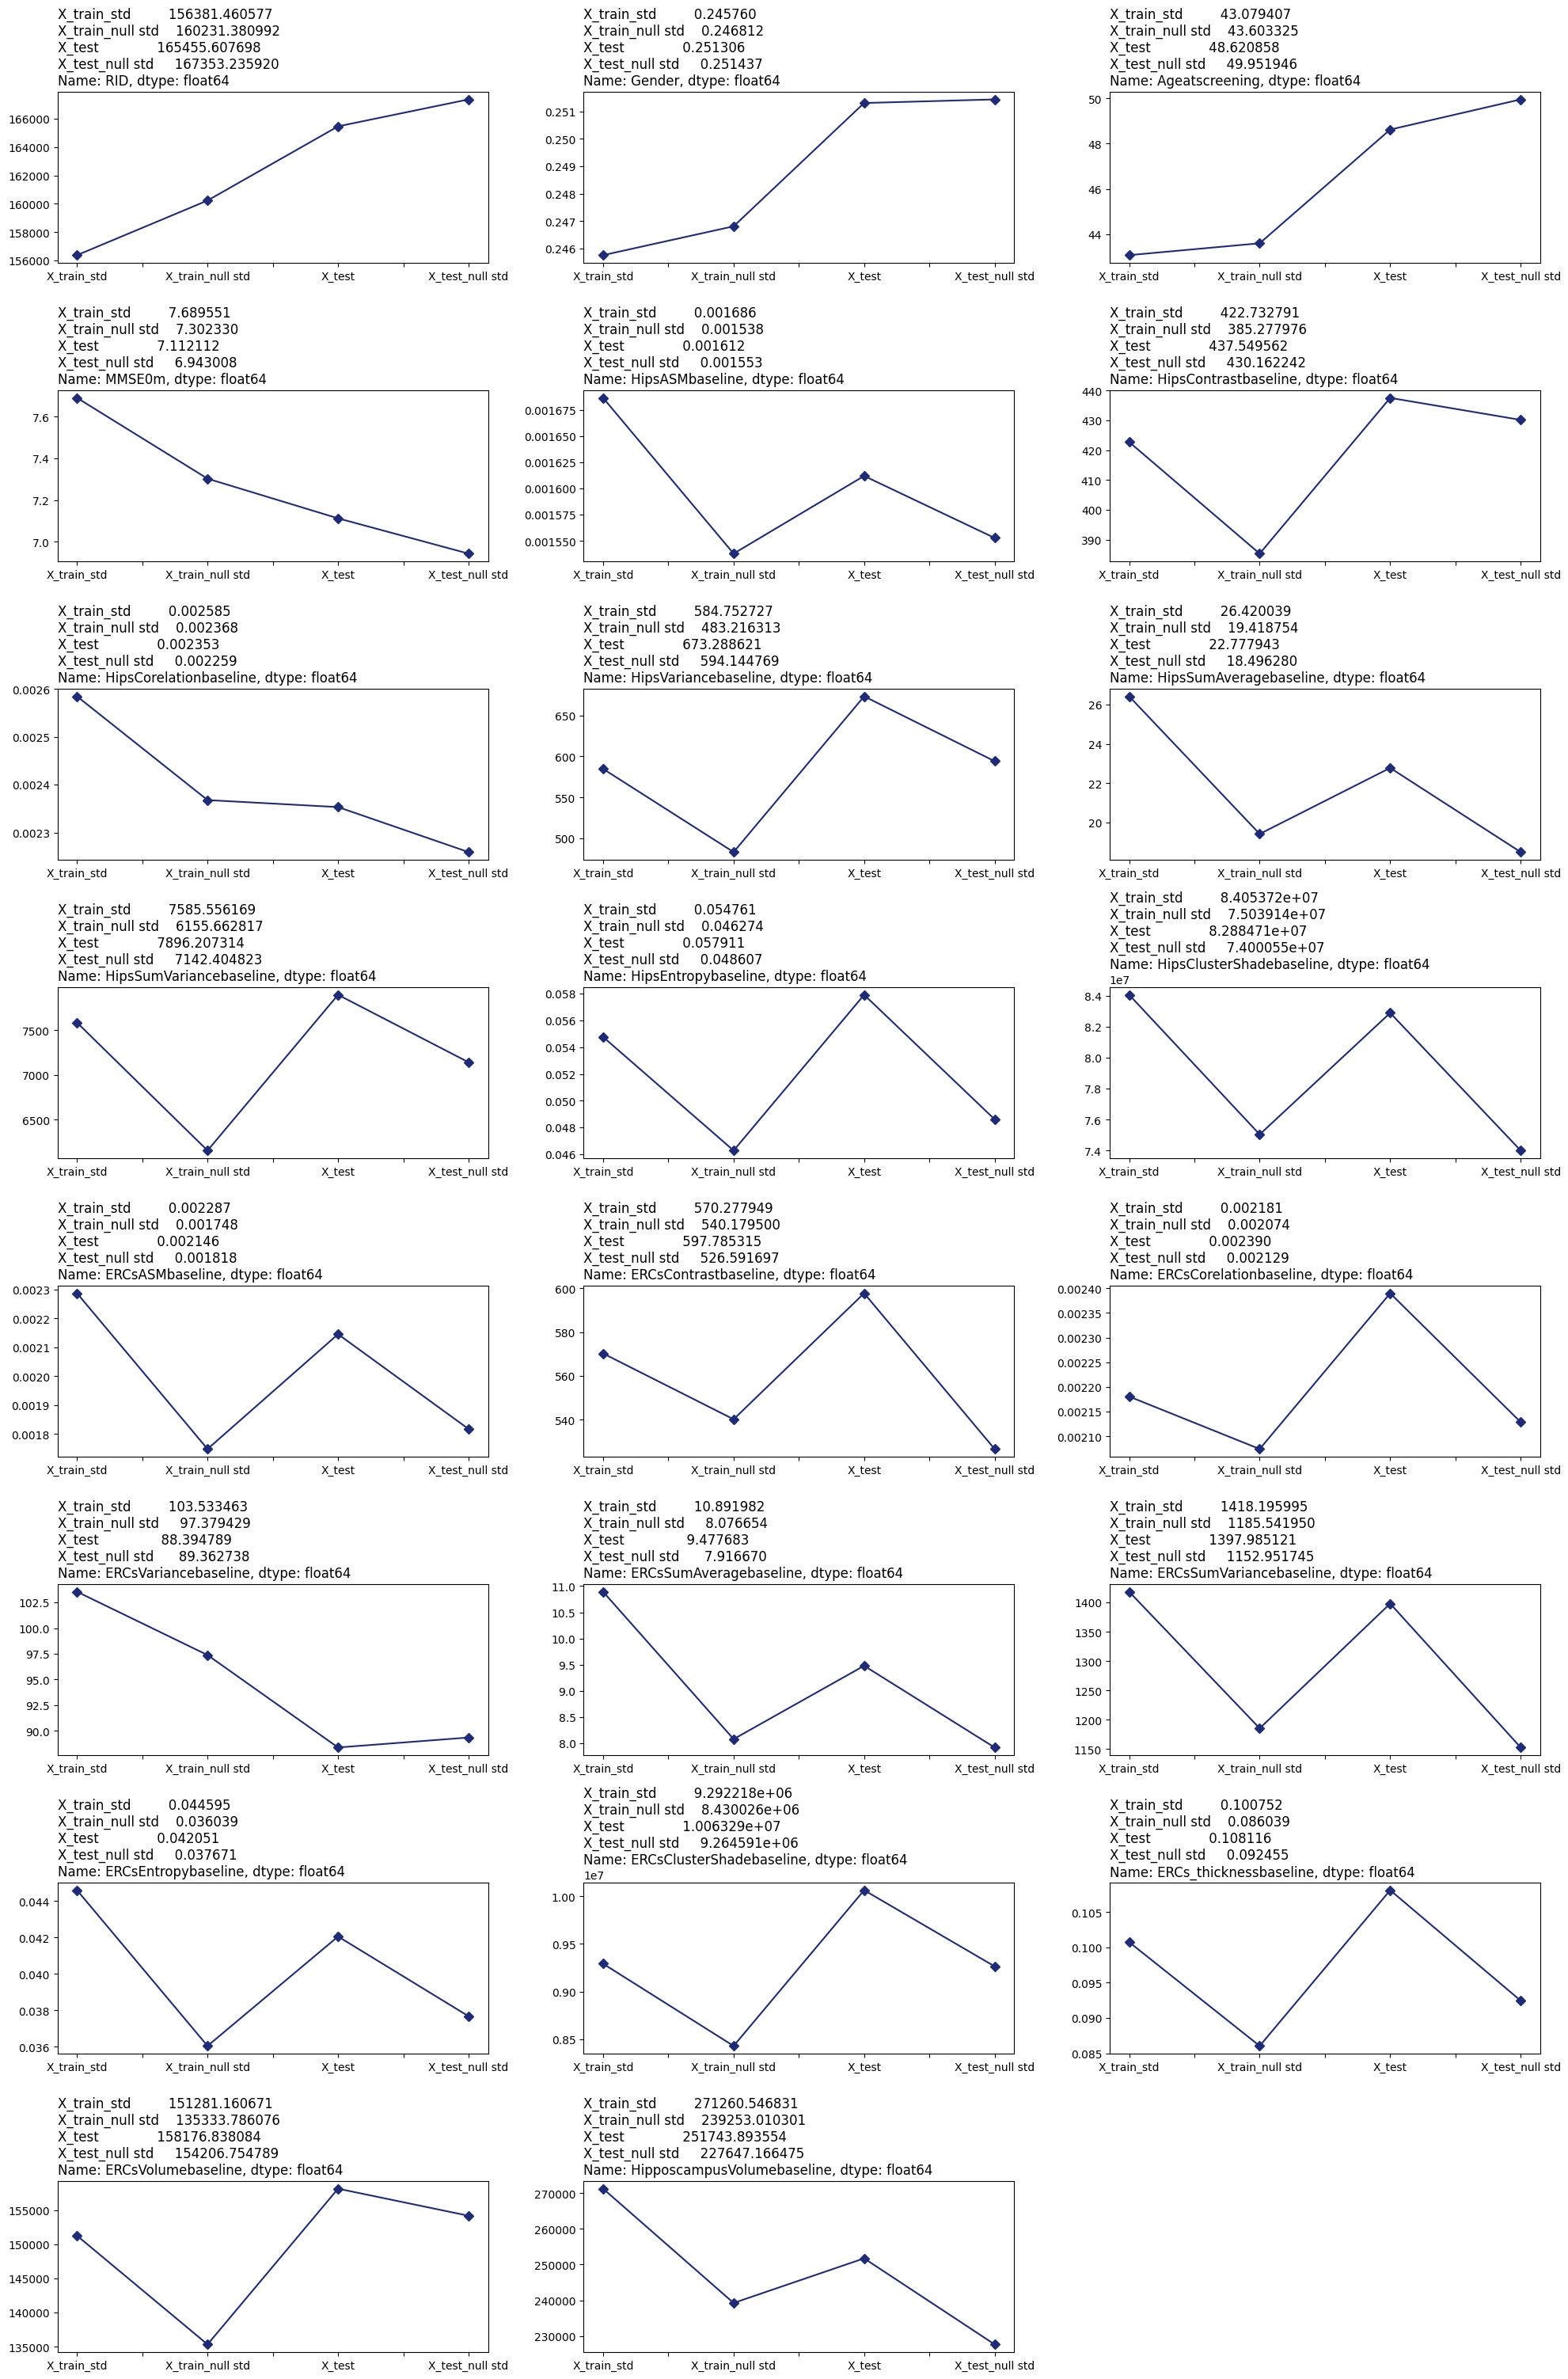

In [41]:
plt.figure(figsize=(20, 45))

for i in range(len(variance_df_check)):
    plt.subplot(12,3,i+1)
    variance_df_check.iloc[i].plot(kind="line",
                                   color="#1e2c78",
                                   marker="D",
                                   label=i,
    )
    plt.title(variance_df_check.iloc[i], loc="left")

plt.tight_layout()